In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

# Data loading

In [219]:
# loading of all the features
chunk_data = np.load('../processed_ntuples/chunking/chunk_wnu_data.npy')

# feats labels, including nu data and the new variables: Pelliccioli (cos\theta* in 1710.09339), Collins-Soper (cos\theta in 1605.05450), Atlas (cos\theta_2D in 1203.2165), Polish (R_pT in 1201.2768)
features = ['lepPt1', 'lepPt2', 'lepEta1', 'lepEta2', 'lepPhi1', 'lepPhi2', 'vbsjetPt1', 'vbsjetPt2',
            'vbsjetEta1', 'vbsjetEta2', 'vbsjetPhi1', 'vbsjetPhi2', 'vbsjetM1', 'vbsjetM2', 'nvbsjetPt1',
            'nvbsjetPt2', 'nvbsjetEta1', 'nvbsjetEta2', 'nvbsjetPhi1', 'nvbsjetPhi2', 'nvbsjetM1', 'nvbsjetM2',
            'mjj', 'detajj', 'ptMET', 'phiMET', 'ptv1', 'ptv2', 'etav1', 'etav2', 'phiv1', 'phiv2',
            'costheta_1', 'costheta_2', 'cos_cs', 'cos_th_1', 'cos_th_2', 'r_pt', 'flag']

# df
data_df = pd.DataFrame(dict(zip(features, chunk_data.T)))
data_df

,lepPt1,lepPt2,lepEta1,lepEta2,lepPhi1,lepPhi2,vbsjetPt1,vbsjetPt2,vbsjetEta1,vbsjetEta2,...,etav2,phiv1,phiv2,costheta_1,costheta_2,cos_cs,cos_th_1,cos_th_2,r_pt,flag
0,-0.384219,-0.919335,-1.444364,0.379386,-0.777735,-0.451011,-1.190387,0.061593,-1.041488,0.766224,...,-0.568074,0.710084,0.373748,-0.955254,0.030640,1.537623,0.382934,-1.929312,-0.132864,1.0
1,1.231413,-0.419090,-1.640480,-0.577148,1.259316,-0.676203,-0.320317,-0.995325,-1.202156,1.177954,...,-2.450763,0.146524,-1.548312,-1.530579,-0.121591,0.418376,1.647245,-0.047567,0.960210,1.0
2,1.459104,0.569787,0.810673,0.047107,-0.283659,1.063204,0.236511,-1.119944,0.736440,-1.436357,...,0.690841,-3.300144,0.946830,1.182317,0.727895,0.238993,-0.400837,0.667091,1.388626,1.0
3,1.131144,0.305541,1.168343,-1.195516,-0.982829,0.797235,-0.185926,0.700990,1.460397,-0.695813,...,0.583511,0.275725,-0.251561,0.758864,-0.824366,1.111751,-0.041240,0.710531,0.513909,1.0
4,-0.308250,-0.420657,0.261331,-0.333682,-0.782519,0.971536,-0.586900,-0.324975,-1.203003,0.435202,...,-0.940571,-0.266078,1.388287,0.734991,-0.589100,-0.450753,0.572468,0.781883,0.025318,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527370,0.395589,0.192478,0.373781,-0.901767,-2.082315,-0.822382,1.045268,0.725649,-0.733517,0.705871,...,-0.363812,-0.338052,1.113830,-0.510163,-1.048495,-1.416999,-0.165517,0.616615,-0.555968,0.0
527371,1.288937,0.292290,0.392429,-1.931113,1.267861,-0.774225,-0.362097,0.300831,-1.521486,0.834741,...,-0.062710,-0.306715,-0.127376,-0.130037,-1.694534,-1.552838,1.914164,0.945619,1.096849,0.0
527372,0.076040,-1.096191,-0.347462,1.032235,-0.009045,-0.053560,0.679169,0.481685,1.458573,-0.809841,...,0.003707,-0.217439,-0.329796,-0.410435,0.541588,-2.135095,-0.973672,-0.545879,-1.116825,0.0
527373,0.949786,0.404208,-0.229787,0.703927,0.170240,-1.711163,0.053127,-1.272843,-0.548039,0.872398,...,-0.283832,-1.049192,0.446542,0.005413,0.621408,-0.667944,0.161726,-0.042047,1.242471,0.0


In [220]:
# ll: 153288, tl: 173972, tt: 200115
ll_df = data_df.iloc[:153288]
tl_df = data_df.iloc[153288:153288+173972]
tt_df = data_df.iloc[153288+173972:]
tx_df = data_df.iloc[153288:]

# Correlation matrices

LL data

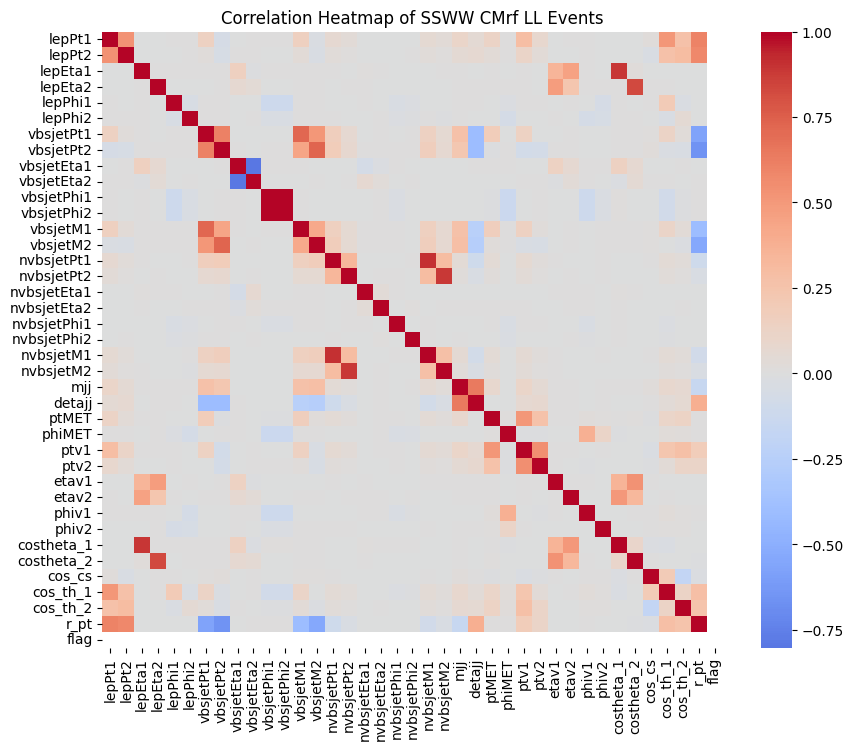

In [221]:
ll_corr_matrix = ll_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(ll_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf LL Events')
plt.savefig('corr/ll_corr.png', dpi=500, bbox_inches='tight')

TL data

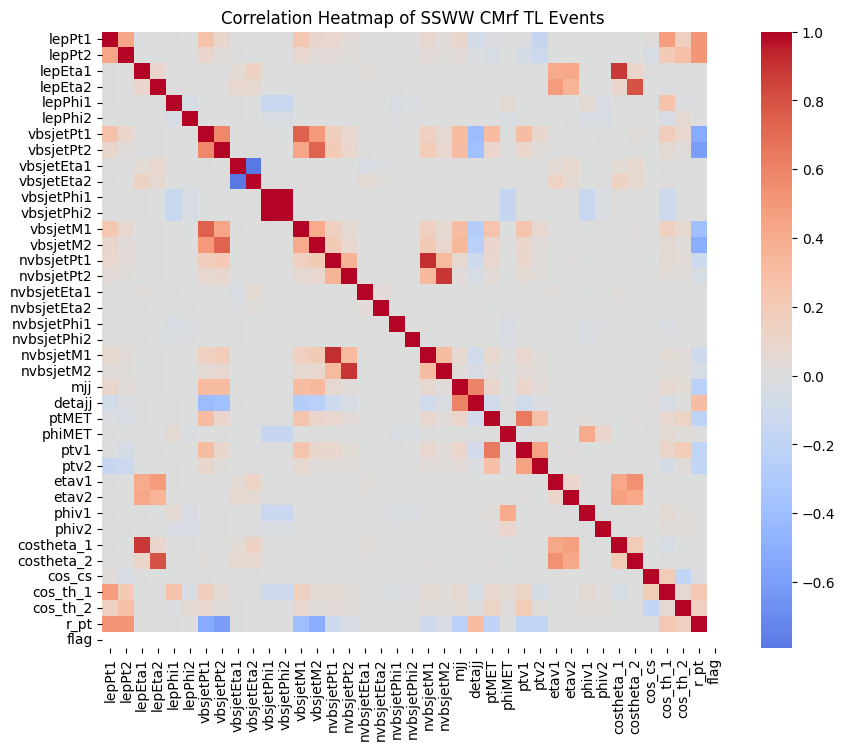

In [222]:
tl_corr_matrix = tl_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tl_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TL Events')
plt.savefig('corr/tl_corr.png', dpi=500, bbox_inches='tight')

TT data

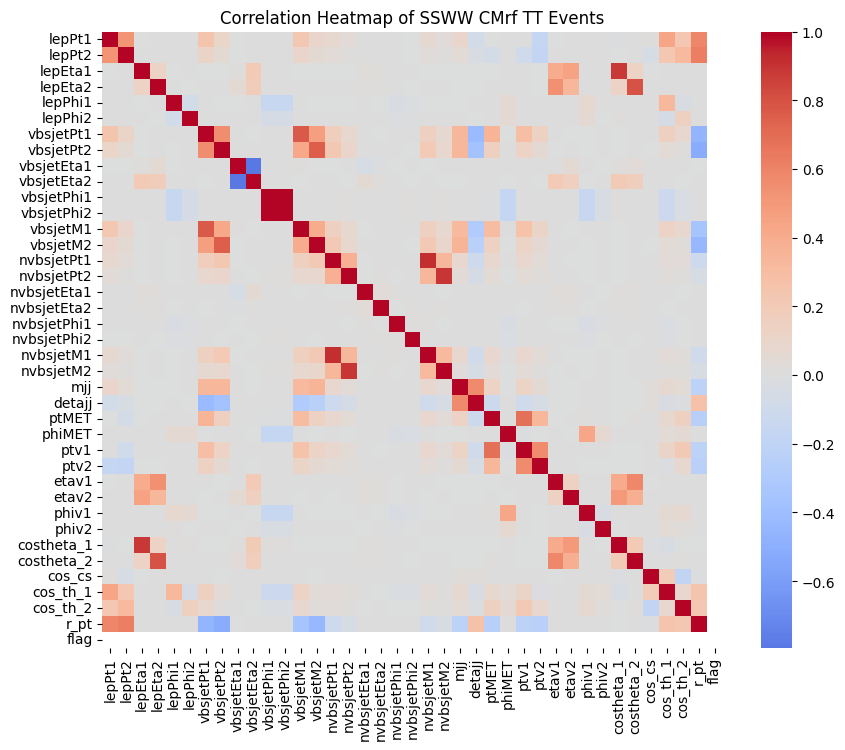

In [223]:
tt_corr_matrix = tt_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tt_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TT Events')
plt.savefig('corr/tt_corr.png', dpi=500, bbox_inches='tight')

TX data (i.e. TL and TT)

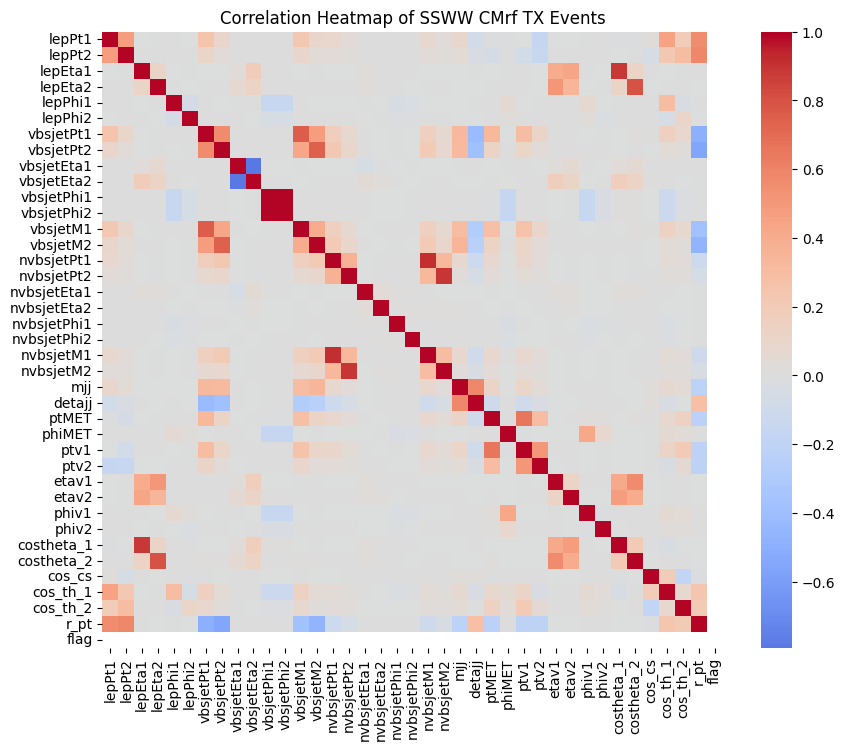

In [224]:
tx_corr_matrix = tx_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tx_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TX Events')
plt.savefig('corr/tx_corr.png', dpi=500, bbox_inches='tight')

Full data

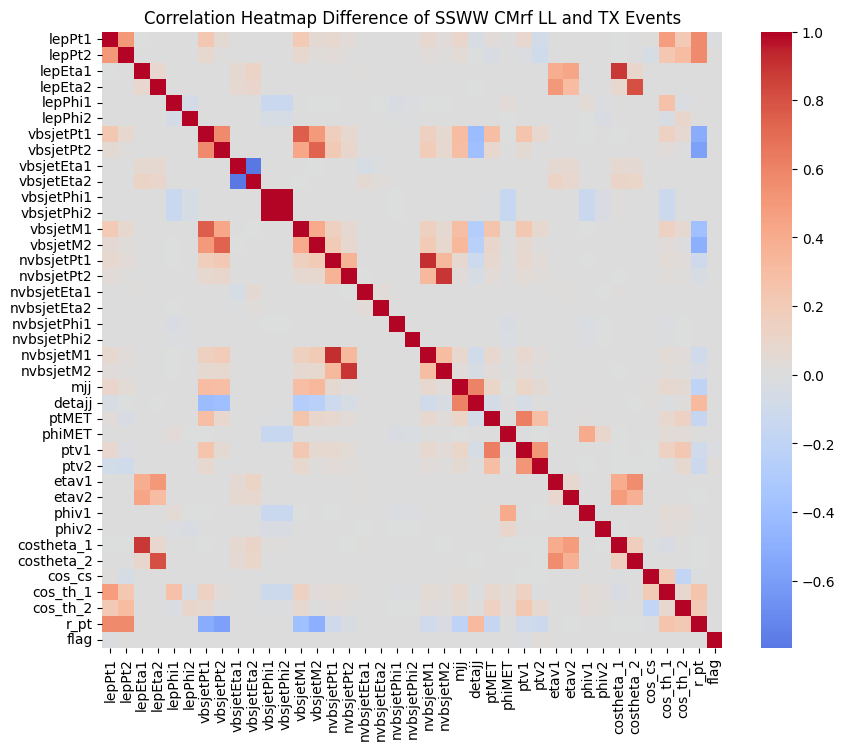

In [225]:
data_corr_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap Difference of SSWW CMrf LL and TX Events')
plt.savefig('corr/data_corr.png', dpi=500, bbox_inches='tight')

Signal minus background

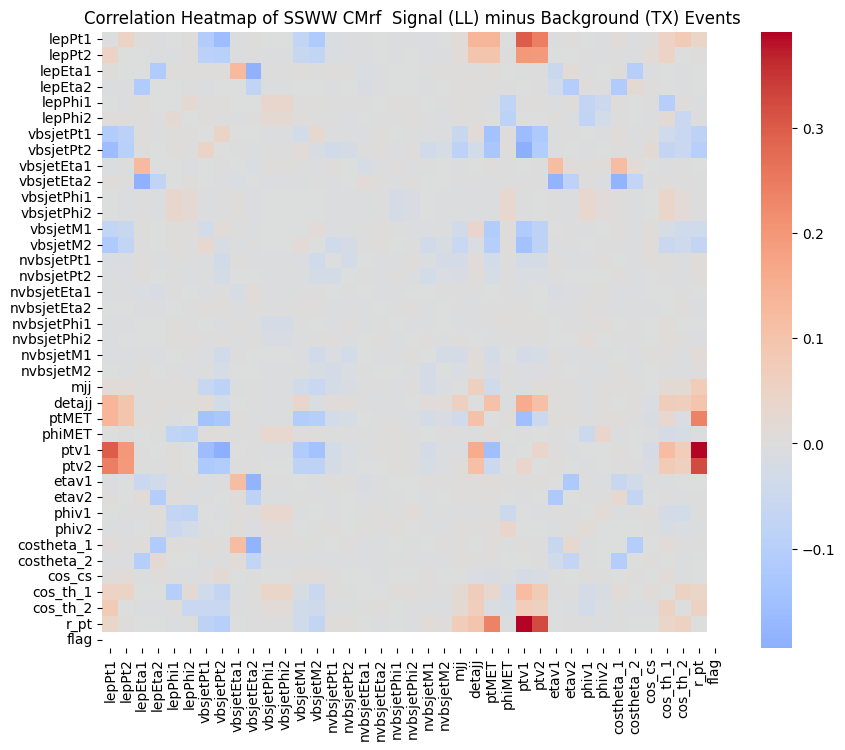

In [226]:
smb_corr_matrix = ll_corr_matrix - tx_corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(smb_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf  Signal (LL) minus Background (TX) Events')
plt.savefig('corr/smb_corr.png', dpi=500, bbox_inches='tight')

# Individual variable couples correlations

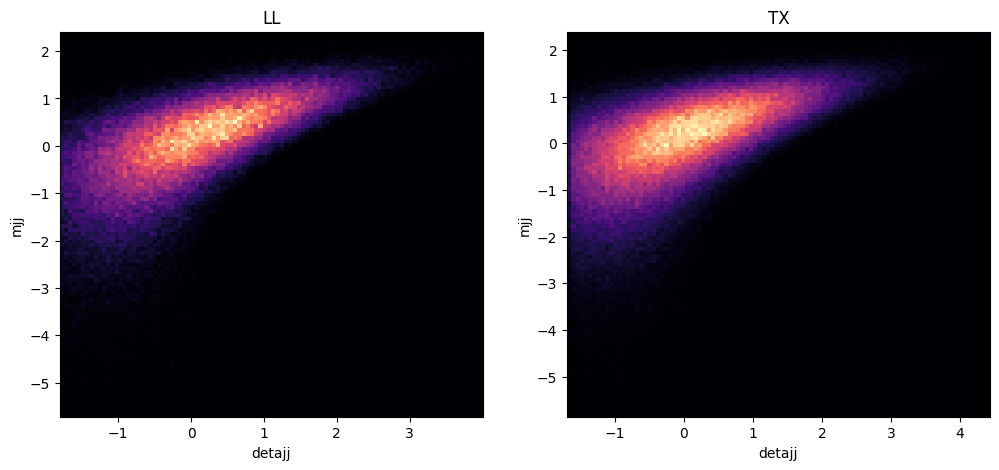

In [227]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
histll = ax[0].hist2d(ll_df['detajj'], ll_df['mjj'], bins=100, cmap='magma')
ax[0].set_xlabel('detajj')
ax[0].set_ylabel('mjj')
ax[0].set_title('LL')
histtx = ax[1].hist2d(tx_df['detajj'], tx_df['mjj'], bins=100, cmap='magma')
ax[1].set_xlabel('detajj')
ax[1].set_ylabel('mjj')
ax[1].set_title('TX')
plt.show()

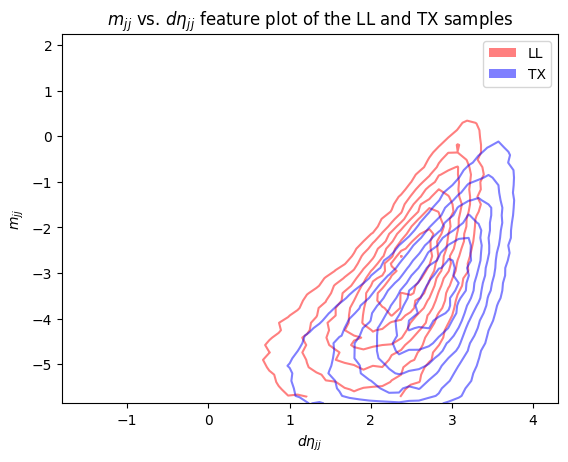

In [228]:
H_ll, xedges, yedges = np.histogram2d(ll_df['detajj'], ll_df['mjj'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = plt.contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['detajj'], tx_df['mjj'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = plt.contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
plt.cla()
plt.contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
plt.contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)

plt.xlabel(f'$d\eta_j$$_j$')
plt.ylabel(f'$m_j$$_j$')
plt.title(f'$m_j$$_j$ vs. $d\eta_j$$_j$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
plt.legend(handles=[proxy1, proxy2], loc='upper right')

plt.show()

In [229]:
import matplotlib.pyplot as plt
print(plt.colormaps())  # Unsorted list of all registered colormap names
print(sorted(plt.colormaps(), key=str.lower))  # Case-insensitive sorted list


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.6917007 , -1.63047282, -1.56924495, -1.50801708, -1.44678921,
        -1.38556134, -1.32433346, -1.26310559, -1.20187772, -1.14064985,
        -1.07942197, -1.0181941 , -0.95696623, -0.89573836, -0.83451048,
        -0.77328261, -0.71205474, -0.65082687, -0.58959899, -0.52837112,
        -0.46714325, -0.40591538, -0.3446875 , -0.28345963, -0.22223176,
        -0.16100389, -0.09977602, -0.03854814,  0.02267973,  0.0839076 ,
         0.14513547,  0.20636335,  0.26759122,  0.32881909,  0.39004696,
         0.45127484,  0.51250271,  0.57373058,  0.63495845,  0.69618633,
         0.7574142 ,  0.81864207,  0.87986994,  0.94109782,  1.00232569,
         1.06355356,  1.12478143,  1.1860093 ,  1.24723718,  1.30846505,
         1.36969292, 

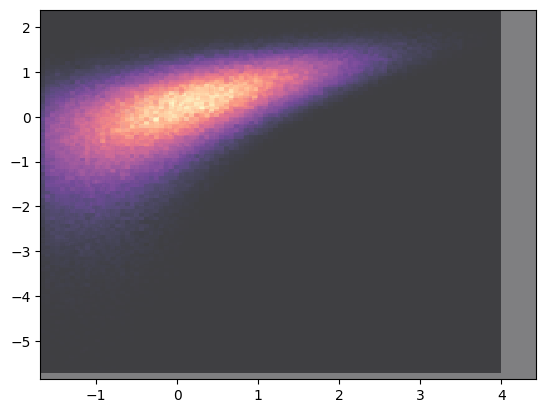

In [230]:
plt.hist2d(ll_df['detajj'], ll_df['mjj'], bins=100, cmap='magma', alpha=0.5)
plt.hist2d(tx_df['detajj'], tx_df['mjj'], bins=100, cmap='magma', alpha=0.5)

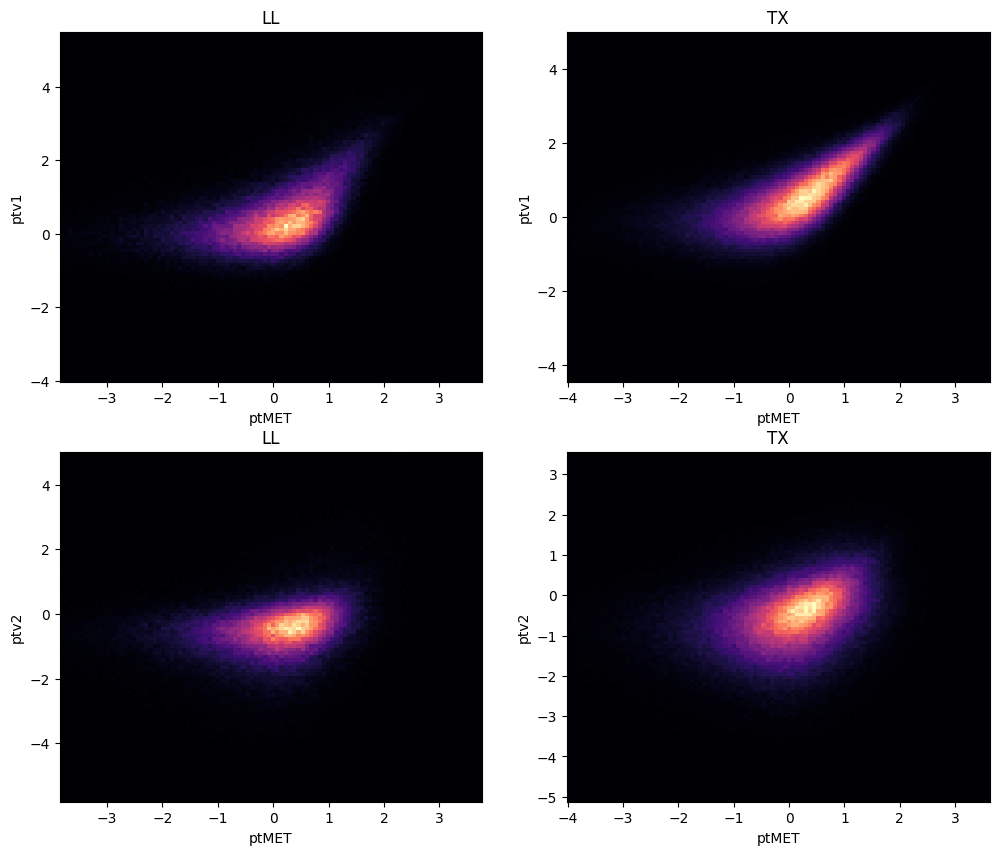

In [231]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
hist_ll1 = ax[0,0].hist2d(ll_df['ptMET'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('ptMET')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
hist_tx1 = ax[0,1].hist2d(tx_df['ptMET'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('ptMET')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
hist_ll2 = ax[1,0].hist2d(ll_df['ptMET'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('ptMET')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
hist_tx2 = ax[1,1].hist2d(tx_df['ptMET'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('ptMET')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
plt.show()

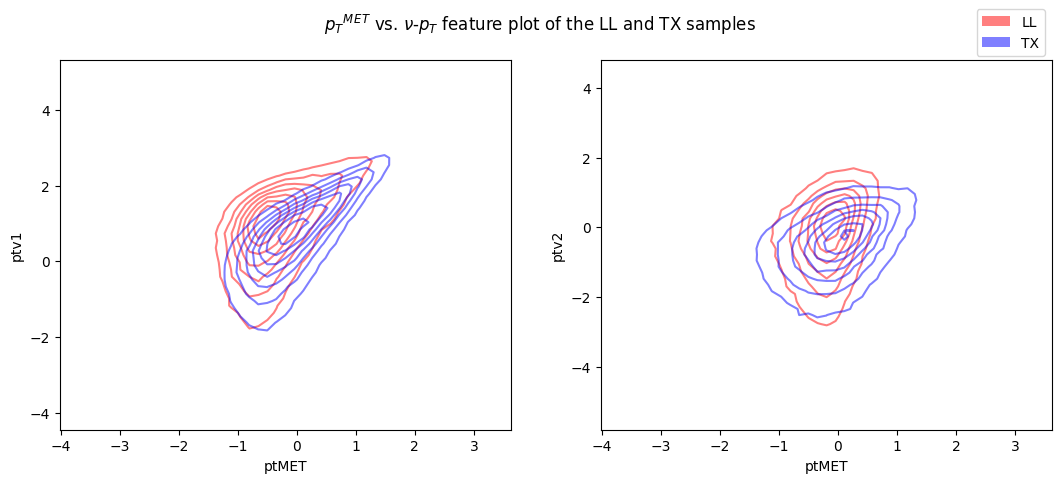

In [232]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(2.*6.4, 4.8))
H_ll, xedges, yedges = np.histogram2d(ll_df['ptMET'], ll_df['ptv1'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['ptMET'], tx_df['ptv1'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[0].cla()
ax[0].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[0].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[0].set_xlabel('ptMET')
ax[0].set_ylabel('ptv1')
H_ll, xedges, yedges = np.histogram2d(ll_df['ptMET'], ll_df['ptv2'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['ptMET'], tx_df['ptv2'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[1].cla()
ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[1].set_xlabel('ptMET')
ax[1].set_ylabel('ptv2')

fig.suptitle(f'$p_T$$^M$$^E$$^T$ vs. $\\nu$-$p_T$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
fig.legend(handles=[proxy1, proxy2], loc='upper right', bbox_to_anchor=(0.9,1.))

plt.show()

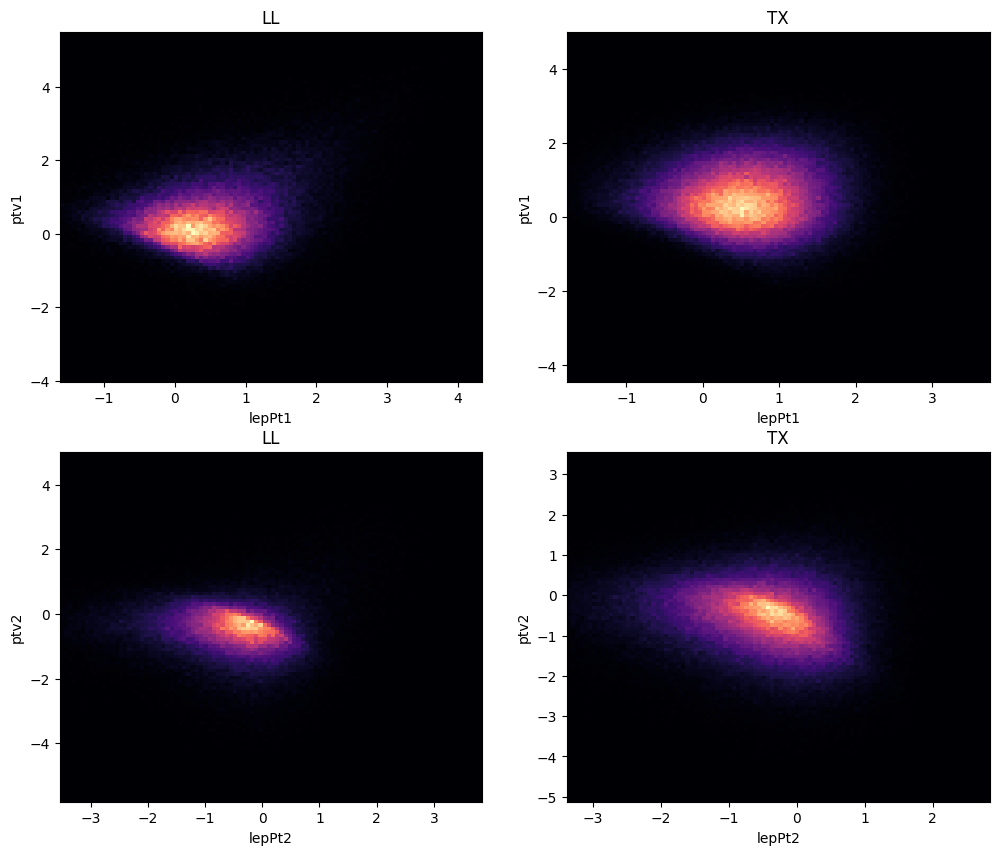

In [233]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# x_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['lepPt1'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('lepPt1')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['lepPt1'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('lepPt1')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['lepPt2'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('lepPt2')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['lepPt2'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('lepPt2')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

plt.savefig('corr/lepPt-ptv.png')
plt.show()

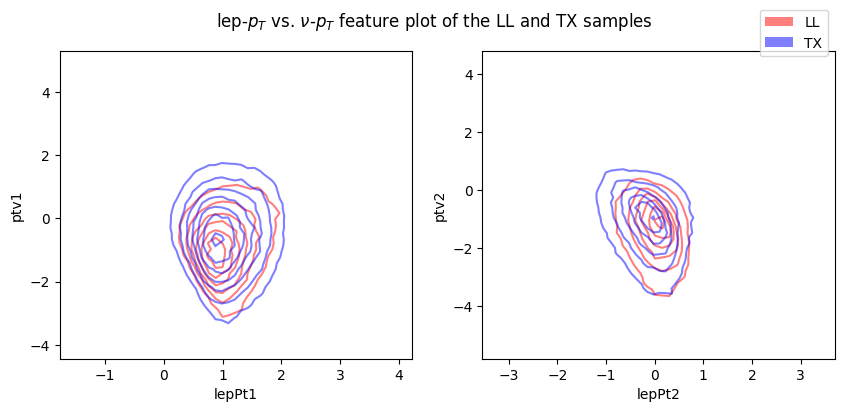

In [245]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10., 4.))
H_ll, xedges, yedges = np.histogram2d(ll_df['lepPt1'], ll_df['ptv1'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['lepPt1'], tx_df['ptv1'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[0].cla()
ax[0].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[0].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[0].set_xlabel('lepPt1')
ax[0].set_ylabel('ptv1')
H_ll, xedges, yedges = np.histogram2d(ll_df['lepPt2'], ll_df['ptv2'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['lepPt2'], tx_df['ptv2'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[1].cla()
ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[1].set_xlabel('lepPt2')
ax[1].set_ylabel('ptv2')

fig.suptitle(f'lep-$p_T$ vs. $\\nu$-$p_T$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
fig.legend(handles=[proxy1, proxy2], loc='upper right', bbox_to_anchor=(0.9,1.))

plt.savefig('corr/lepPt-ptv.png', dpi=500, bbox_inches='tight')
plt.show()

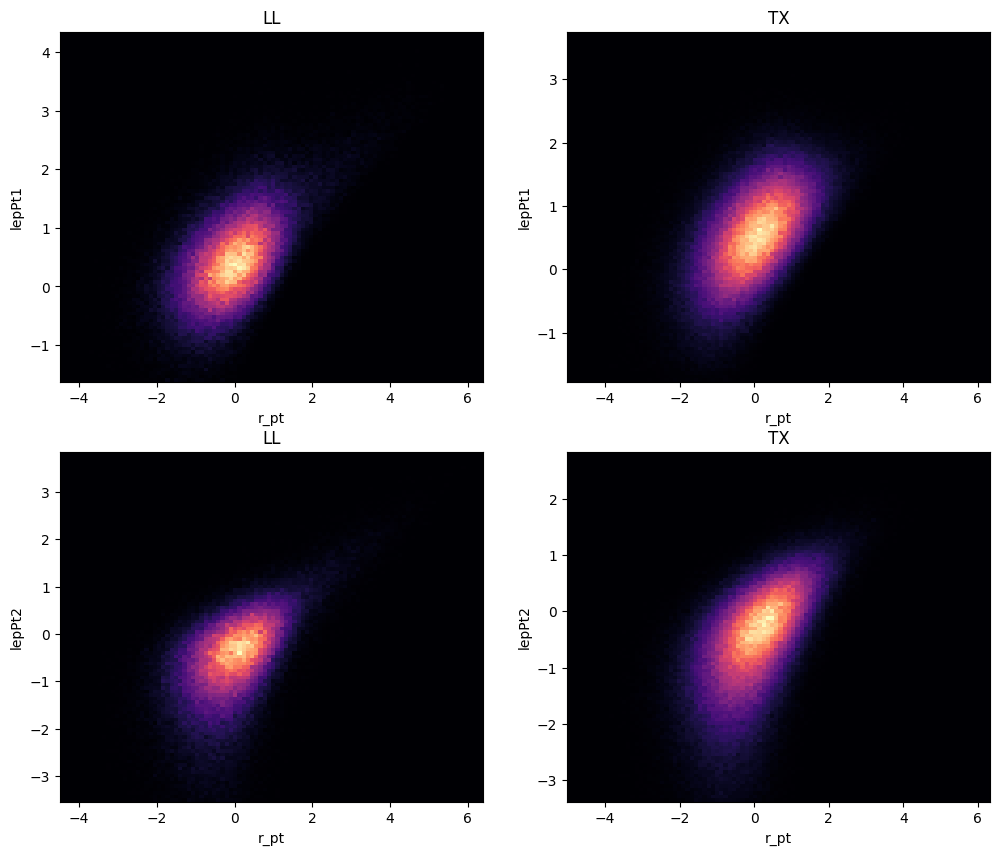

In [235]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))

#ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['lepPt1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('lepPt1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['lepPt1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('lepPt1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['lepPt2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('lepPt2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['lepPt2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('lepPt2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)
plt.show()

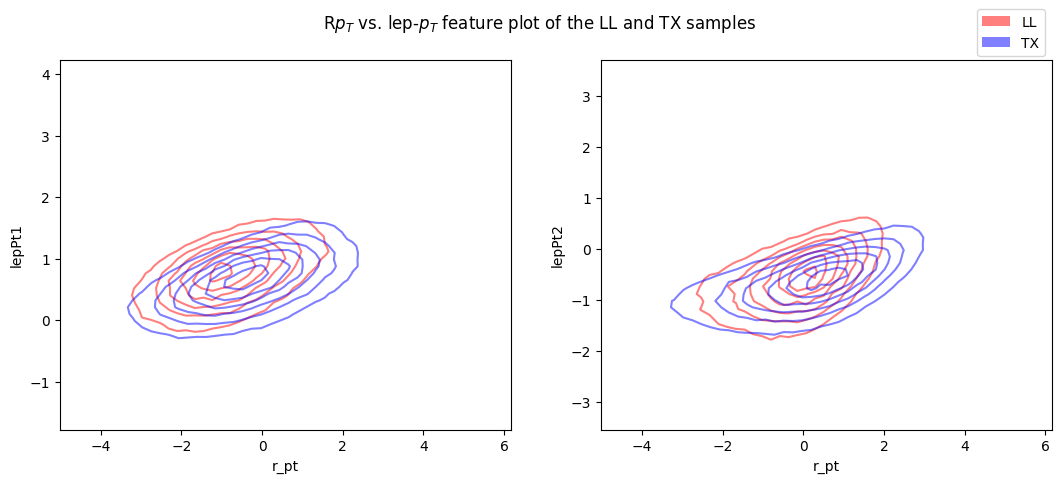

In [236]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(2.*6.4, 4.8))
H_ll, xedges, yedges = np.histogram2d(ll_df['r_pt'], ll_df['lepPt1'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['r_pt'], tx_df['lepPt1'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[0].cla()
ax[0].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[0].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[0].set_xlabel('r_pt')
ax[0].set_ylabel('lepPt1')
H_ll, xedges, yedges = np.histogram2d(ll_df['r_pt'], ll_df['lepPt2'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['r_pt'], tx_df['lepPt2'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[1].cla()
ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[1].set_xlabel('r_pt')
ax[1].set_ylabel('lepPt2')

fig.suptitle(f'R$p_T$ vs. lep-$p_T$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
fig.legend(handles=[proxy1, proxy2], loc='upper right', bbox_to_anchor=(0.9,1.))

plt.show()

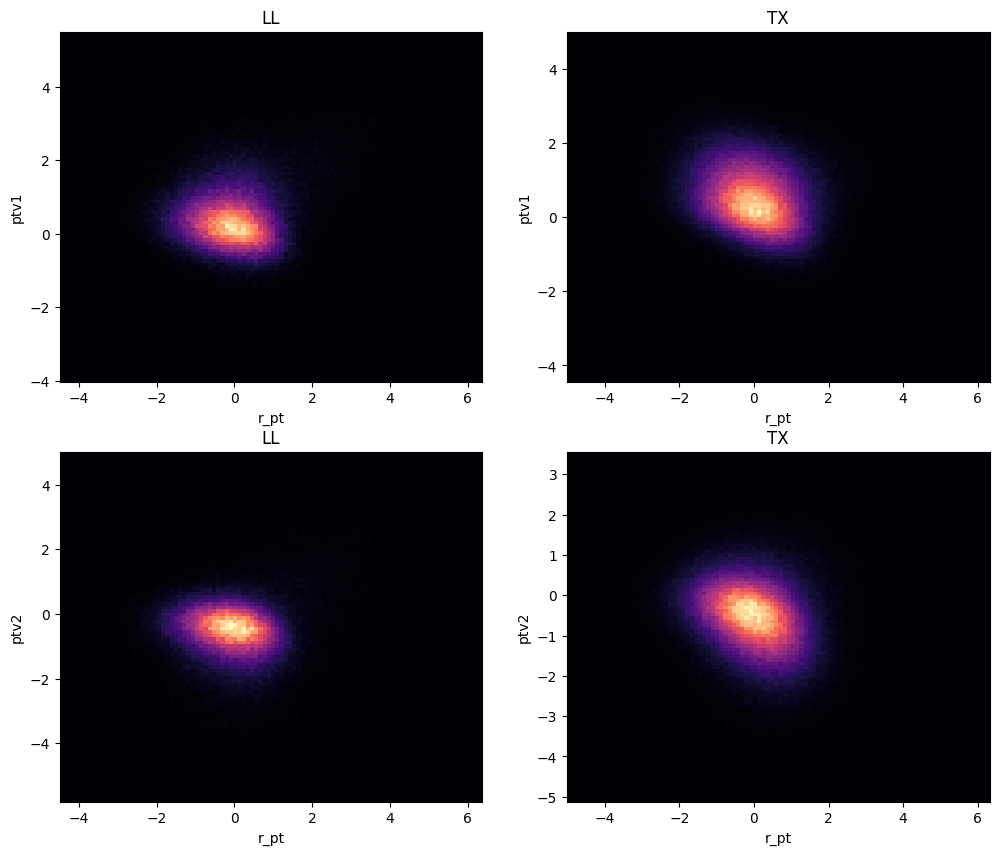

In [237]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

plt.savefig('corr/rPt-ptv.png')
plt.show()

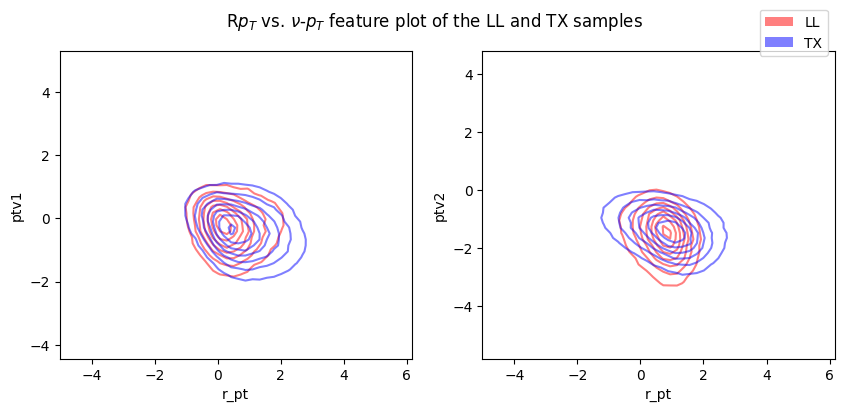

In [246]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10., 4.))
H_ll, xedges, yedges = np.histogram2d(ll_df['r_pt'], ll_df['ptv1'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['r_pt'], tx_df['ptv1'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[0].cla()
ax[0].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[0].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[0].set_xlabel('r_pt')
ax[0].set_ylabel('ptv1')
H_ll, xedges, yedges = np.histogram2d(ll_df['r_pt'], ll_df['ptv2'], bins=50)
X_ll, Y_ll = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_ll = ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5).levels[1:]
H_tx, xedges, yedges = np.histogram2d(tx_df['r_pt'], tx_df['ptv2'], bins=50)
X_tx, Y_tx = np.meshgrid(xedges[:-1], yedges[:-1])
lvls_tx = ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5).levels[1:]
ax[1].cla()
ax[1].contour(X_ll.T, Y_ll.T, H_ll.T, colors='red', alpha=0.5, levels=lvls_ll)
ax[1].contour(X_tx.T, Y_tx.T, H_tx.T, colors='blue', alpha=0.5, levels=lvls_tx)
ax[1].set_xlabel('r_pt')
ax[1].set_ylabel('ptv2')

fig.suptitle(f'R$p_T$ vs. $\\nu$-$p_T$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
fig.legend(handles=[proxy1, proxy2], loc='upper right', bbox_to_anchor=(0.9,1.))

plt.savefig('corr/rPt-ptv.png', dpi=500, bbox_inches='tight')
plt.show()

In [239]:
#